In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
car = pd.read_csv('/content/car price .csv')

In [3]:
car.head()

,Model,Price,Year,Transmission,Body,Fuel,Capacity,Mileage,Fuel_Price,USD_rate,Crude_Oil_Price
0,Hyundai Tucson,7900000,2011,Automatic,SUV / 4x4,Petrol,2000,92000,450,366.39,32916.4776
1,Toyota Prius,7225000,2013,Automatic,Saloon,Hybrid,1800,91000,450,366.39,32916.4776
2,Suzuki Alto,2895000,2015,Manual,Hatchback,Petrol,800,110000,450,366.39,32916.4776
3,Micro Panda,2475000,2016,Manual,Hatchback,Petrol,1000,72000,450,366.39,32916.4776
4,Toyota Vitz,4850000,2008,Automatic,Hatchback,Petrol,1000,89700,450,366.39,32916.4776


In [4]:
car.tail()

,Model,Price,Year,Transmission,Body,Fuel,Capacity,Mileage,Fuel_Price,USD_rate,Crude_Oil_Price
16297,Nissan Sunny,3400000,2000,Automatic,Saloon,Petrol,1500,155000,177,202.91,16299.7603
16298,Kia Picanto,4590000,2016,Automatic,Hatchback,Petrol,1000,41833,177,202.91,16299.7603
16299,Toyota Allion,15300000,2017,Automatic,Saloon,Petrol,1500,12000,177,202.91,16299.7603
16300,Toyota Land Cruiser Prado,14000000,2007,Manual,SUV / 4x4,Diesel,4200,111000,121,202.91,16299.7603
16301,Toyota Axio,6650000,2010,Automatic,Saloon,Petrol,1499,90000,177,202.91,16299.7603


In [5]:
car.shape

(16302, 11)

In [6]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16302 entries, 0 to 16301
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Model            16302 non-null  object 
 1   Price            16302 non-null  int64  
 2   Year             16302 non-null  int64  
 3   Transmission     16302 non-null  object 
 4   Body             16302 non-null  object 
 5   Fuel             16302 non-null  object 
 6   Capacity         16302 non-null  int64  
 7   Mileage          16302 non-null  int64  
 8   Fuel_Price       16302 non-null  int64  
 9   USD_rate         16302 non-null  float64
 10  Crude_Oil_Price  16302 non-null  float64
dtypes: float64(2), int64(5), object(4)
memory usage: 1.4+ MB


In [7]:
car['Model'].value_counts()

Toyota Vitz           842
Suzuki Alto           673
Toyota Premio         555
Toyota Aqua           550
Toyota Axio           529
                     ... 
BMW ActiveHybrid 7     16
Suzuki Escudo          16
Isuzu Gemini           16
Nissan Presea          16
Maruti Suzuki Zen      16
Name: Model, Length: 168, dtype: int64

In [8]:
car['Transmission'].value_counts()

Automatic    12010
Manual        3012
Tiptronic     1280
Name: Transmission, dtype: int64

In [9]:
car['Body'].value_counts()

Hatchback    6829
Saloon       5360
SUV / 4x4    4113
Name: Body, dtype: int64

In [10]:
car['Fuel'].value_counts()

Petrol    11559
Hybrid     2535
Diesel     2208
Name: Fuel, dtype: int64

In [11]:
# Convert Categorical to numeric variable 

car['Model'] = pd.factorize(car.Model)[0]
car['Transmission'] = pd.factorize(car.Transmission)[0]
car['Body'] = pd.factorize(car.Body)[0]
car['Fuel'] = pd.factorize(car.Fuel)[0]

In [12]:
car['Model'].value_counts()

4      842
2      673
24     555
31     550
20     529
      ... 
163     16
67      16
165     16
64      16
167     16
Name: Model, Length: 168, dtype: int64

In [13]:
car['Transmission'].value_counts()

#Automatic    12010
#Manual        3012
#Tiptronic     1280

0    12010
1     3012
2     1280
Name: Transmission, dtype: int64

In [14]:
car['Body'].value_counts()

#Hatchback    6829
#Saloon       5360
#SUV / 4x4    4113

2    6829
1    5360
0    4113
Name: Body, dtype: int64

In [15]:
car['Fuel'].value_counts()
#Petrol    11559
#Hybrid     2535
#Diesel     2208

0    11559
1     2535
2     2208
Name: Fuel, dtype: int64

In [16]:
car.isnull().sum()

Model              0
Price              0
Year               0
Transmission       0
Body               0
Fuel               0
Capacity           0
Mileage            0
Fuel_Price         0
USD_rate           0
Crude_Oil_Price    0
dtype: int64

In [17]:
car.describe()

,Model,Price,Year,Transmission,Body,Fuel,Capacity,Mileage,Fuel_Price,USD_rate,Crude_Oil_Price
count,16302.000000,1.630200e+04,16302.000000,16302.000000,16302.000000,16302.000000,16302.000000,16302.000000,16302.000000,16302.000000,16302.000000
mean,48.977855,1.021067e+07,2011.375843,0.341799,1.166605,0.426389,1537.829223,85403.610232,319.246534,296.274288,28681.307329
std,44.051567,1.182727e+07,7.932643,0.618087,0.802177,0.717983,749.891666,61969.720030,132.117396,71.366235,8186.927842
min,0.000000,9.900000e+02,1960.000000,0.000000,0.000000,0.000000,2.000000,0.000000,121.000000,200.910000,16200.151100
25%,15.000000,3.790000e+06,2008.000000,0.000000,0.000000,0.000000,1000.000000,41000.000000,177.000000,202.830000,18111.783700
50%,32.000000,6.300000e+06,2014.000000,0.000000,1.000000,0.000000,1500.000000,75000.000000,254.000000,325.080000,32322.635200
75%,74.000000,1.175000e+07,2017.000000,1.000000,2.000000,1.000000,1970.000000,120000.000000,450.000000,359.920000,36133.776000
max,167.000000,1.790000e+08,2021.000000,2.000000,2.000000,2.000000,10000.000000,956384.000000,470.000000,369.030000,41187.015400


Correlation:

Positive Correlation

Negative Correlation

In [18]:
correlation = car.corr()

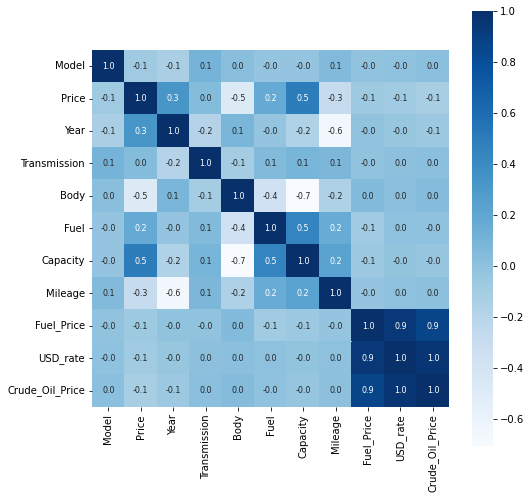

In [19]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [20]:
print(correlation['Price'])

Model             -0.071700
Price              1.000000
Year               0.331509
Transmission       0.041916
Body              -0.476421
Fuel               0.176875
Capacity           0.496134
Mileage           -0.283145
Fuel_Price        -0.060441
USD_rate          -0.075790
Crude_Oil_Price   -0.113534
Name: Price, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


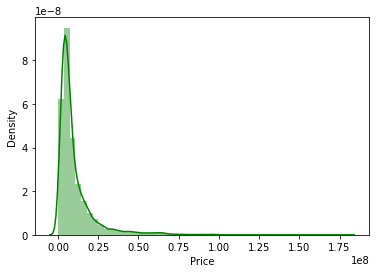

In [21]:
sns.distplot(car['Price'],color='green')

Splitting the Features and Target

In [22]:
X = car.drop(['Price'],axis=1)
Y = car['Price']

In [23]:
print(X)

       Model  Year  Transmission  Body  Fuel  Capacity  Mileage  Fuel_Price  \
0          0  2011             0     0     0      2000    92000         450   
1          1  2013             0     1     1      1800    91000         450   
2          2  2015             1     2     0       800   110000         450   
3          3  2016             1     2     0      1000    72000         450   
4          4  2008             0     2     0      1000    89700         450   
...      ...   ...           ...   ...   ...       ...      ...         ...   
16297     30  2000             0     1     0      1500   155000         177   
16298     83  2016             0     2     0      1000    41833         177   
16299     15  2017             0     1     0      1500    12000         177   
16300     11  2007             1     0     2      4200   111000         121   
16301     20  2010             0     1     0      1499    90000         177   

       USD_rate  Crude_Oil_Price  
0        366.39 

In [24]:
print(Y)

0         7900000
1         7225000
2         2895000
3         2475000
4         4850000
           ...   
16297     3400000
16298     4590000
16299    15300000
16300    14000000
16301     6650000
Name: Price, Length: 16302, dtype: int64


Splitting into Training data and Test Data

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

Model Training: Random Forest Regressor

In [26]:
regressor = RandomForestRegressor(n_estimators=100)

In [27]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [28]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [29]:
print(test_data_prediction)

[9386400. 3388150. 2524900. ...  758250.  845650. 7311300.]


In [30]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.870093509247891


In [31]:
car.head()

,Model,Price,Year,Transmission,Body,Fuel,Capacity,Mileage,Fuel_Price,USD_rate,Crude_Oil_Price
0,0,7900000,2011,0,0,0,2000,92000,450,366.39,32916.4776
1,1,7225000,2013,0,1,1,1800,91000,450,366.39,32916.4776
2,2,2895000,2015,1,2,0,800,110000,450,366.39,32916.4776
3,3,2475000,2016,1,2,0,1000,72000,450,366.39,32916.4776
4,4,4850000,2008,0,2,0,1000,89700,450,366.39,32916.4776


Compare the Actual Values and Predicted Values in a Plot

In [32]:
Y_test = list(Y_test)

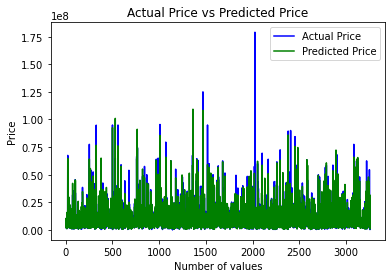

In [33]:
plt.plot(Y_test, color='blue', label = 'Actual Price')
plt.plot(test_data_prediction, color='green', label='Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('Price')
plt.legend()
plt.show()

In [34]:
import pickle

In [35]:
pickle.dump(regressor, open('/content/randomf.pkl', 'wb'))